In [2]:
from brian2 import *
from brian2tools import *
%matplotlib inline


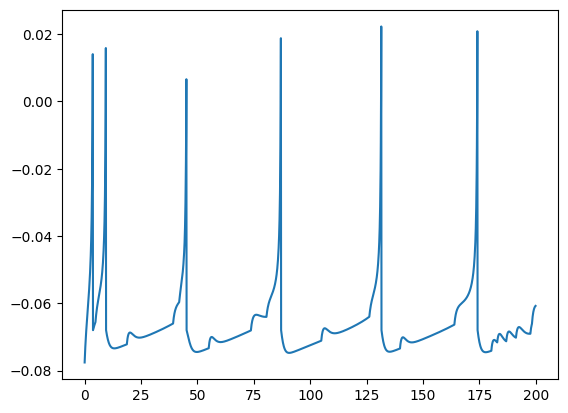

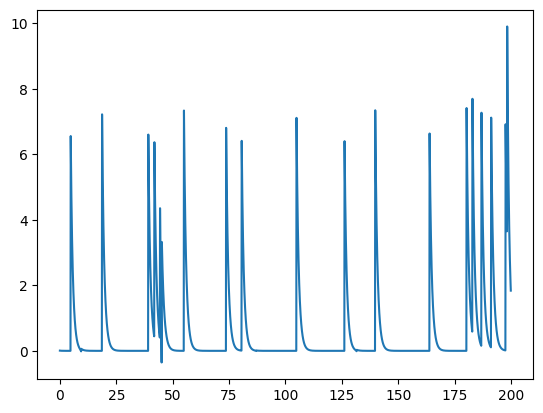

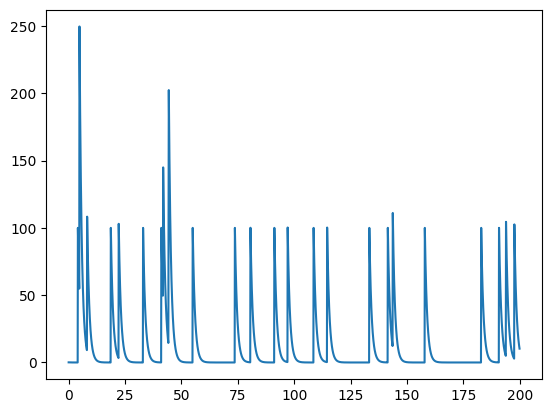

WARNING    c:\Users\sanci\AppData\Local\Programs\Python\Python311\Lib\site-packages\brian2tools\plotting\data.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)
 [py.warnings]
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



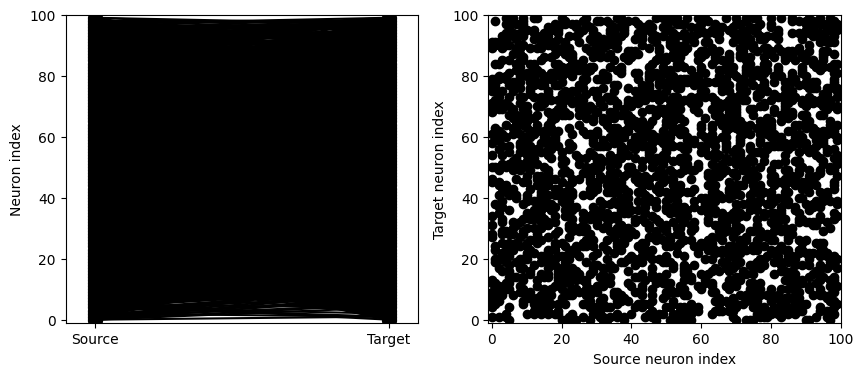

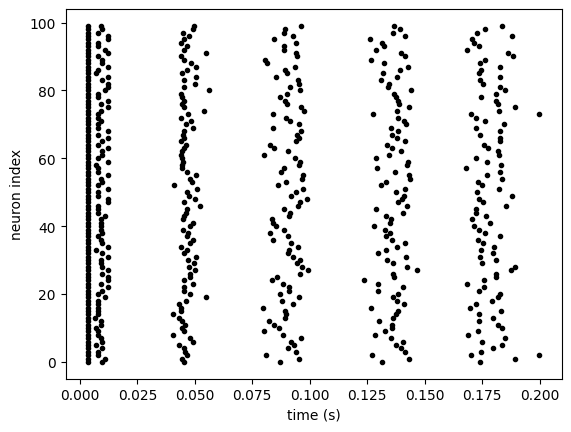

In [7]:
start_scope()


Vthr = 30 * mvolt       # threshold value for Izhikevich neuron
EL = -75 * mV           # initial value of membrane potentials
tau_s = 1 * ms          # time constant for synatic dynamics
we = 0.1 *amp/mV        # weights for excitatory synapses
wi = 0.1 *amp/mV        # weights for inhibitory synapses
Vi = -90 * mV           # resting potential for inhibitory synaptic currents.
Ve = 0 * mV             # resting potential for excitatory synaptic currents.
dly=(3+rand())*ms 
par_percent=10 

eqs_dyn = """
dv/dt=(0.04/ms/mV)*v**2+(5/ms)*v+140*mV/ms-u/ms+I*mV/(amp*ms)+Is*mV/(amp*ms) : volt
du/dt=a*(b*v-u)/ms                                           : volt
I : amp
Is=ge*(Ve-v)+gi*(Vi-v) :  amp
dge/dt=-ge/tau_e	: amp/volt
dgi/dt=-gi/tau_i	: amp/volt
a : 1
b : 1
c : volt
d : volt
tau_e : second
tau_i : second
"""

eqs_reset = '''
v = c
u = u+d
'''

PG = PoissonGroup(100, 5 * Hz)

G = NeuronGroup(100, model=eqs_dyn, method='rk4', threshold='v>Vthr', reset=eqs_reset)
G.a = 0.02*((100-par_percent+2*par_percent*rand())/100)
G.b = 0.2*((100-par_percent+2*par_percent*rand())/100)
G.c = -65*((100-par_percent+2*par_percent*rand())/100) * mvolt        
G.d = 8*(100-par_percent+2*par_percent*rand())/100* mvolt 
G.v = EL*((100-par_percent+2*par_percent*rand())/100)
G.u = (-14.5*((100-par_percent+2*par_percent*rand())/100))*mvolt
G.tau_e = tau_s
G.tau_i = tau_s
G.I = 10*amp
G.ge = 0.1*(amp/volt)
G.gi = 0.1*(amp/volt)

S = Synapses(PG, G,'w :siemens', delay=dly, on_pre='ge += we')
S.connect(p=0.25)

statemon = StateMonitor(G, 'v', record=True)
monge = StateMonitor(G, 'ge', record=True)
spikemon = SpikeMonitor(G)
statemon_1 = StateMonitor(G, 'Is', record=True)

duration1=200*ms
run(duration1)
plt.figure(1)
plt.plot(statemon.t/ms, statemon.v[0])
plt.show()


plt.figure(2)
plt.plot(statemon_1.t/ms, statemon_1.Is[0])
plt.show()

plt.figure(3)
plt.plot(monge.t/ms, monge.ge[10])
plt.show()

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)
90
plt.figure(4)
plot_raster(spikemon.i, spikemon.t, time_unit=second, marker='.', color='k')
plt.show()